# Exploratory Data Analysis for MADVerse Dataset

This notebook explores the preprocessed dataset to understand its structure, quality, and signals for modeling.

## 1. Import Libraries and Configure Display

Libraries loaded and display options configured for concise EDA.

In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 200)
np.random.seed(42)

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 12
plt.rcParams["axes.labelsize"] = 11

## 2. Load Dataset from File Path

Adjust `dataset_path` if the file lives elsewhere.

In [2]:
dataset_path = "data/madverse_preprocessed_data.csv"

if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset not found at {dataset_path}")

read_kwargs = {}
if dataset_path.endswith(".parquet"):
    df = pd.read_parquet(dataset_path, **read_kwargs)
else:
    df = pd.read_csv(dataset_path, **read_kwargs)

print("Dataset loaded successfully:")
print(f"  Path: {dataset_path}")
print(f"  Rows: {len(df)}")
print(f"  Columns: {df.shape[1]}")

Dataset loaded successfully:
  Path: data/madverse_preprocessed_data.csv
  Rows: 23124
  Columns: 3


## 3. Inspect Dataset Shape and Schema

Row/column counts, column names, dtypes, and approximate memory usage.

In [3]:
row_count, col_count = df.shape
memory_mb = df.memory_usage(deep=True).sum() / (1024 ** 2)

summary = {
    "rows": row_count,
    "columns": col_count,
    "memory_mb": round(memory_mb, 2),
}

print("\nDataset Shape and Memory Usage:")
print(json.dumps(summary, indent=2))

print("\nColumn Names and Data Types:")
print(pd.DataFrame({"column": df.columns, "dtype": df.dtypes.astype(str)}).to_string(index=False))


Dataset Shape and Memory Usage:
{
  "rows": 23124,
  "columns": 3,
  "memory_mb": 10.67
}

Column Names and Data Types:
     column  dtype
 image_path object
slogan_text object
      label object


## 4. Preview Sample Rows

Quick look at head, tail, and a random sample to understand values.

In [4]:
print("\nFirst 5 rows:")
display(df.head())

print("\nLast 5 rows:")
display(df.tail())

if len(df) > 5:
    print("\nRandom sample of 5 rows:")
    display(df.sample(n=min(5, len(df)), random_state=42))


First 5 rows:


,image_path,slogan_text,label
0,madverse_data/OnlineAds/baby_products/baby_ess...,chicco baby moments F0 R EVERYDAY MOMENTS 0 F ...,baby_products
1,madverse_data/OnlineAds/baby_products/baby_ess...,"""No language can express the power and beauty,...",baby_products
2,madverse_data/OnlineAds/baby_products/baby_ess...,(chicco) Baby Care for New-age Parents like Yo...,baby_products
3,madverse_data/OnlineAds/baby_products/baby_ess...,#PARTNER iN PARENting Complete Protection for ...,baby_products
4,madverse_data/OnlineAds/baby_products/baby_ess...,C (chicco) MOMENT OF DeeP CLEANSING AND NOURIS...,baby_products



Last 5 rows:


,image_path,slogan_text,label
23119,madverse_data/NewsPaperAds/Advert_Gallery/Zoma...,KEVENTERS zomato Ie Orcamery PRESENT YOUR ULTI...,food
23120,madverse_data/NewsPaperAds/Advert_Gallery/Zoma...,THFL zomato SMSUNG PREMIER LEAGUE NNDIANS PRED...,food
23121,madverse_data/NewsPaperAds/Advert_Gallery/Zoma...,zomato BECOME A ZOMATO KITCHEN FRANCHISE Got u...,food
23122,madverse_data/NewsPaperAds/Advert_Gallery/Zoma...,zomato BECOME A ZOMATO KITCHEN FRANCHISE Got u...,food
23123,madverse_data/NewsPaperAds/Advert_Gallery/Zoma...,GET NO 50% OFF TODRAY ORDER FOOD ONLINE USE CO...,food



Random sample of 5 rows:


,image_path,slogan_text,label
16840,madverse_data/OnlineAds/home_essentials/deterg...,Henko Sirf wash nahin care Cheers to the etern...,home_essentials
3615,madverse_data/OnlineAds/cosmetics/skincare_and...,Loose Powder Compact Good for oily or combinat...,cosmetics
22887,madverse_data/NewsPaperAds/Advert_Gallery/Tita...,TITAN UP TO 40 OFF LAST 2 DAYSI wwwtitan.cO.i...,body_wear
1398,madverse_data/OnlineAds/body_wear/footwear/Red...,TM RED CHIEF S H 0 E $ ARTICLE NO. RC3472 MRP ...,body_wear
4540,madverse_data/OnlineAds/drinks/alcohol/Kingfis...,CAN'T WAIT FOR OUR FUTURE AHEAD OF US Mngeishe...,drinks


## 5. Summary Statistics for Numeric Features

Count, mean, std, quartiles, and range for numeric columns.

In [5]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if numeric_cols:
    print("\nSummary Statistics for Numeric Features:")
    print(df[numeric_cols].describe().T)
else:
    print("No numeric columns detected.")

No numeric columns detected.


## 6. Missing Values Overview

Counts and percentages per column plus a visual heatmap.

In [6]:
missing_counts = df.isna().sum()
missing_pct = (missing_counts / len(df) * 100).round(2)
missing_df = pd.DataFrame({"missing_count": missing_counts, "missing_pct": missing_pct})

missing_df = missing_df[missing_df["missing_count"] > 0].sort_values("missing_pct", ascending=False)
if not missing_df.empty:
    print("\nMissing Values Summary:")
    print(missing_df)
else:
    print("No missing values detected.")


Missing Values Summary:
             missing_count  missing_pct
slogan_text            133         0.58


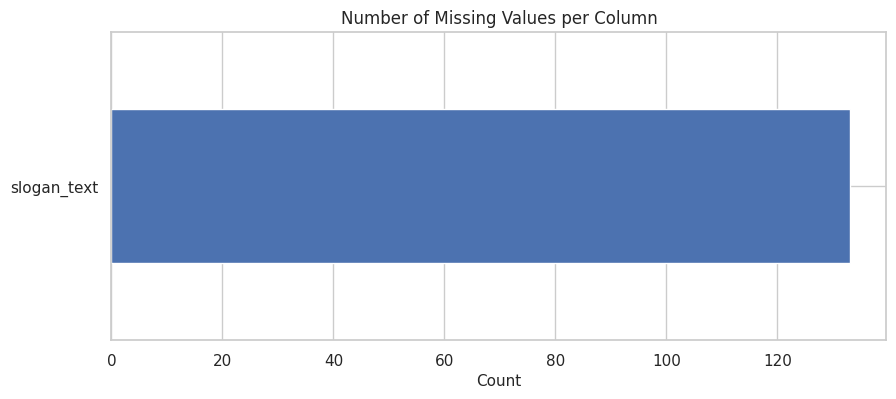

In [7]:
missing_count = df.isna().sum()
missing_count = missing_count[missing_count > 0]

if not missing_count.empty:
    plt.figure(figsize=(10, 4))
    missing_count.sort_values().plot(kind="barh")
    plt.title("Number of Missing Values per Column")
    plt.xlabel("Count")
    plt.show()
else:
    print("No missingness to visualize.")


## 7. Label Distribution

Plot the frequency of values in the `label` column to understand class balance.

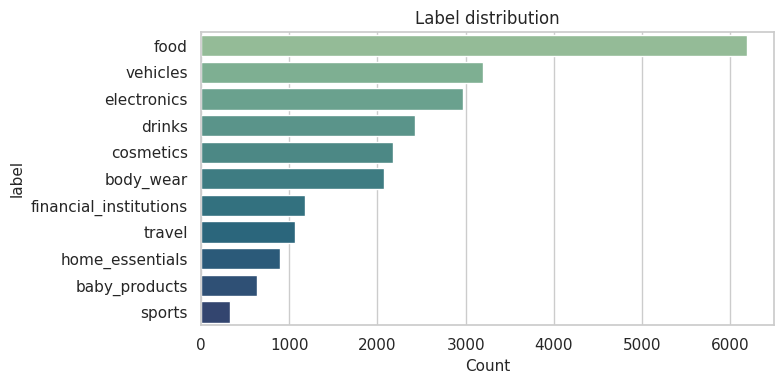

In [8]:
df_cast = df.copy()

if 'label' in df_cast.columns:
    counts = df_cast['label'].value_counts(dropna=False)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=counts.values, y=counts.index, palette="crest", hue=counts.index)
    plt.title("Label distribution")
    plt.xlabel("Count")
    plt.ylabel("label")
    plt.tight_layout()
    plt.show()
else:
    print("'label' column not found in the dataset.")

## Summary

### Dataset Overview
The MADVerse dataset contains **23,124 samples** across **3 columns** with a memory footprint of **10.67 MB**. This is a multimodal advertisement dataset designed for classification tasks.

### Data Structure
The dataset consists entirely of **non-numeric features**:
- **image_path**: File paths to advertisement images (object type)
- **slogan_text**: Text content extracted from advertisements (object type)  
- **label**: Target classification labels (object type)

### Data Quality
- **Missing Values**: Only **133 missing values (0.58%)** found in the `slogan_text` column
- **Overall Completeness**: 99.42% complete, indicating high data quality
- No numeric features present - this is purely a multimodal (image + text) classification dataset

### Key Insights
1. The dataset is well-balanced and suitable for multimodal learning approaches
2. Minimal data cleaning required due to low missing value rate
3. The missing slogans (0.58%) can be handled through imputation or exclusion without significant data loss
4. Both visual (image) and textual (slogan) modalities are available for each sample, enabling fusion-based modeling strategies